# Matplotlib Tips & Tricks

## Table of Contents
1. [Matplotlib Object Hierarchy](#hierarchy)
2. [Stateful vs stateless approach](#state)
3. [Modifying x or y ticks](#modifying_ticks)
4. [Creating multiple plots with different arrangements](#creating_multiple_plots)
5. [Increasing font for all plots](#font)
6. [Setting plotting styles](#style)

## <a name="hierarchy"></a> Matplotlib Object Hierarchy

Information for this section taken from Real [Python Matplotlib Guide](https://realpython.com/python-matplotlib-guide/).

A plot is really a hierachy of nested python objects, this is something we don't often think about when plotting but is a usefull reminder for the next sections.

In [1]:
from IPython.display import display, Image
display(Image(filename='img/fig_map.png'))

FileNotFoundError: [Errno 2] No such file or directory: 'img/fig_map.png'

A Figure object is the outermost container for a matplotlib graphic, it holds one or more Axes (actual plots). Below the Axes in the hierarchy are smaller objects such as tick marks, individual lines, legends and text boxes.

## <a name="state"></a> Stateful vs stateless approach

Matplotlib has dual interfaces: a convenient MATLAB-style state-based interface (statefull), and a more powerful object-oriented interface (stateless).

### Stateful
- There's only ever one Figure or Axes that you're manipulating at a given time, and you don't need to explicitly refer to it.
- The stateful interface makes its calls with `plt.plot()` and other top-level pyplot functions.
- It is important to note that this interface is stateful: it keeps track of the “current” figure and axes, which are where all plt commands are applied.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

In [3]:
x = np.random.randint(low=1, high=11, size=50)
y = x + np.random.randint(1, 5, size=x.size)

Text(0.5, 1.0, 'Stateful Example')

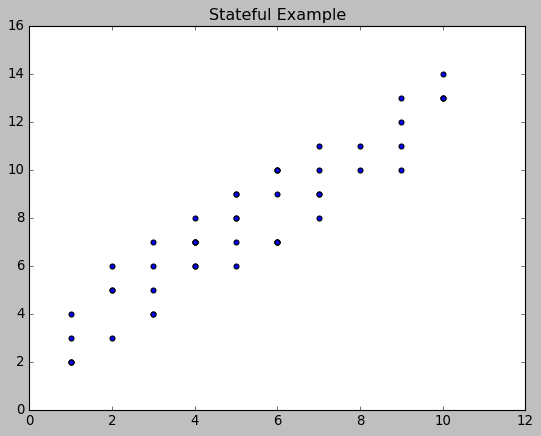

In [4]:
plt.scatter(x, y)
# Calling plt.title() gets translated into this one line: gca().set_title("Stateful Example")
plt.title('Stateful Example')

### Stateless
Modifying the underlying objects directly is the object-oriented approach. First we take the object references into variables (fig, ax, li) and then call plotting functions that are methods of explicit Figure and Axes objects.

This approach is more customizable and comes handy as graphs become more complex.

Text(0.5, 1.0, 'Stateless Example')

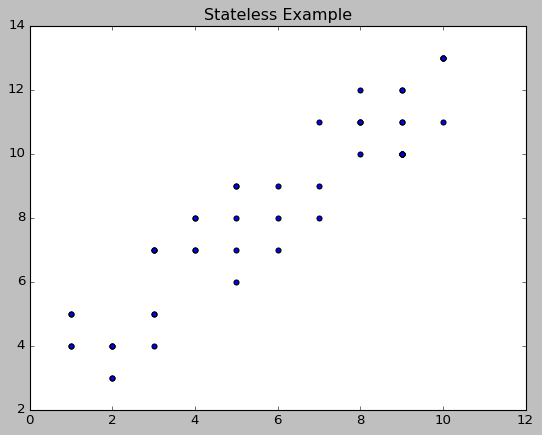

In [6]:
# Take object references into variables
fig = plt.figure()
ax = plt.axes()
# Call plotting function as Axes method
scatter = ax.scatter(x, y)
ax.set_title('Stateless Example')

## <a name="modifying_ticks"></a> Modifying x or y ticks

This is an excerpt from the [Python Data Science Handbook](https://www.oreilly.com/library/view/python-data-science/9781491912126/) by Jake VanderPlas.

A little bit of context before we talk about modifying ticks.

Within each axis, there is the concept of a *major tick mark*, and a *minor tick mark*. Major ticks are usually bigger, while minor ticks are smaller. By default, Matplotlib rarely makes use of minor ticks, but one place you can see them is within logarithmic plots:

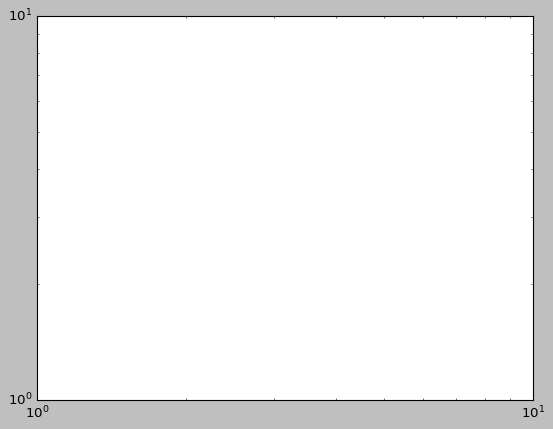

In [7]:
ax = plt.axes(xscale='log', yscale='log')
ax.grid()

In the plot above. Each major tick shows a label, while each minor tick shows no label.

Tick properties such as location and labels, can be customized by setting the formatter and locator objects of each axis.

### Hiding Ticks and Labels

One common tick/label formatting operation is the act of hiding ticks or labels. This can be done using plt.NullLocator() and plt.NullFormatter(), as shown here:

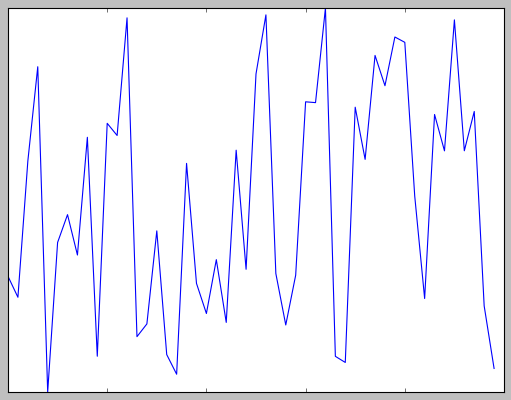

In [8]:
ax = plt.axes()
ax.plot(np.random.rand(50))

ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.NullFormatter())

Notice that we've removed the labels (but kept the ticks/gridlines) from the x axis, and removed the ticks (and thus the labels as well) from the y axis.

### Reducing or Increasing the Number of Ticks
One common problem with the default settings is that smaller subplots can end up with crowded labels. We can see this in the plot grid shown here:

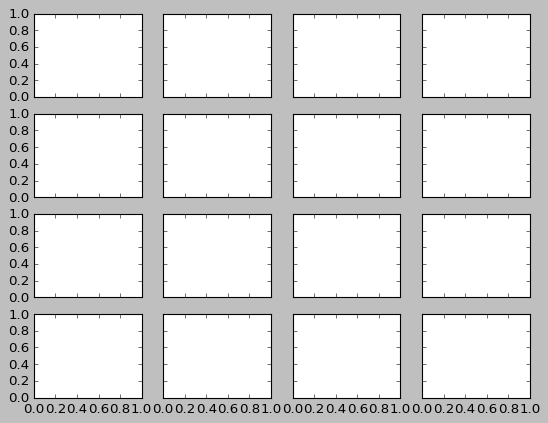

In [9]:
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)

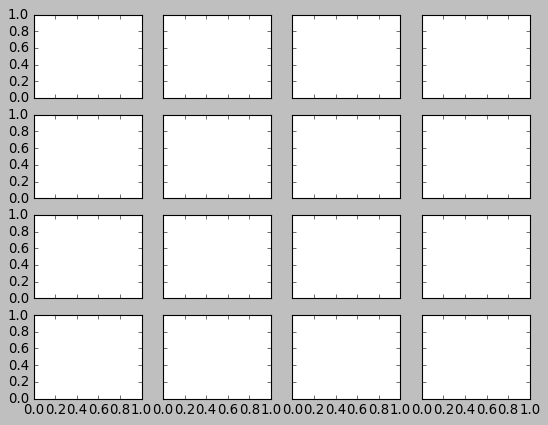

In [7]:
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)

We can fix this with the `plt.MaxNLocator()`, which allows us to specify the maximum number of ticks that will be displayed. Given this maximum number, Matplotlib will use internal logic to choose the particular tick locations:

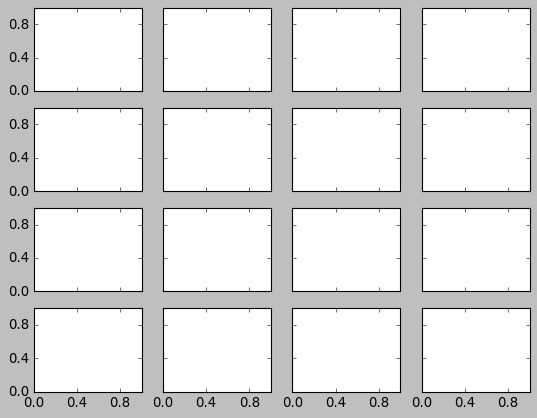

In [8]:
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(3))
    axi.yaxis.set_major_locator(plt.MaxNLocator(3))
fig

Another way of customizing the number of ticks and deciding on tick locations is using `plt.MultipleLocator`. This class locates ticks at a multiple of the number you provide:

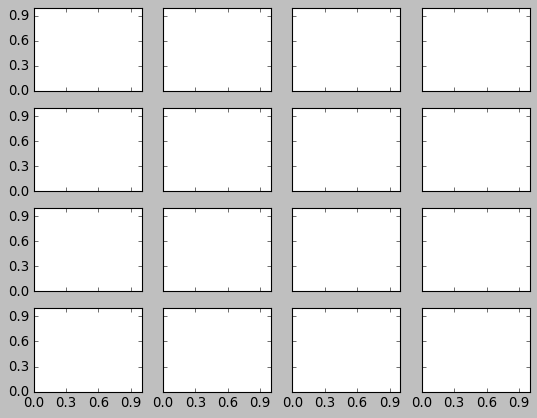

In [9]:
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MultipleLocator(0.3))
    axi.yaxis.set_major_locator(plt.MultipleLocator(0.3))
fig

In the example above we're setting a tick every 0.3 units.

Matplotlib has additional classes for defining number of ticks or/and their location, take a look at this image to see how they differ:

In [10]:
display(Image(filename='img/matplotlib_locator.png', width=100))

FileNotFoundError: [Errno 2] No such file or directory: 'img/matplotlib_locator.png'

### Setting tick format


#### Setting labels as %
Matplotlib has a module that contains classes for configuring tick location and formatting called `matplotlib.ticker`. This module contains a `PercentFormatter` class for formating labels as a percentage

In [11]:
import matplotlib.ticker as mtick

In [12]:
x = np.random.randint(low=1, high=11, size=50)
y = x + np.random.randint(1, 5, size=x.size)

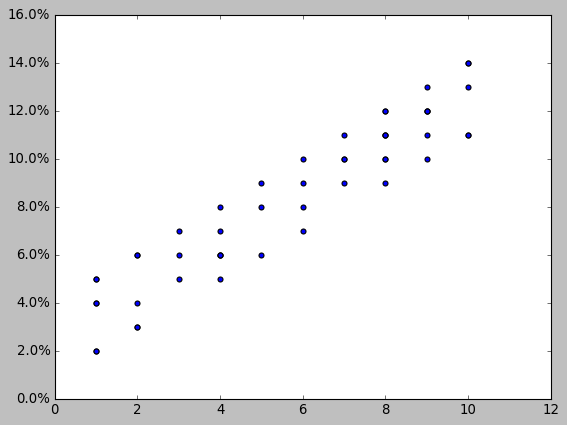

In [13]:
fig = plt.figure()
ax = plt.axes()
ax.scatter(x, y)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

#### Creating custom labels
Imagine we wanted to create a custom function for formating labels where we would convert thousands to K and millions to MM. We would use the `FuncFormatter` class from `matplotlib.ticker` as follows:

In [16]:
def abreviate_thousands_and_millions(value, tick_number):
    if value // 1000000:
        new_value=value//1000000
        return '${:,.1f}MM'.format(new_value)
    elif value // 1000:
        new_value=value//1000
        return '${:,.1f}K'.format(new_value)
    else:
        new_value=value
    return '${:,.1f}'.format(new_value)

In [17]:
x = np.random.randint(low=200, high=10000000, size=50)
y = x + np.random.randint(1, 1000000, size=x.size)

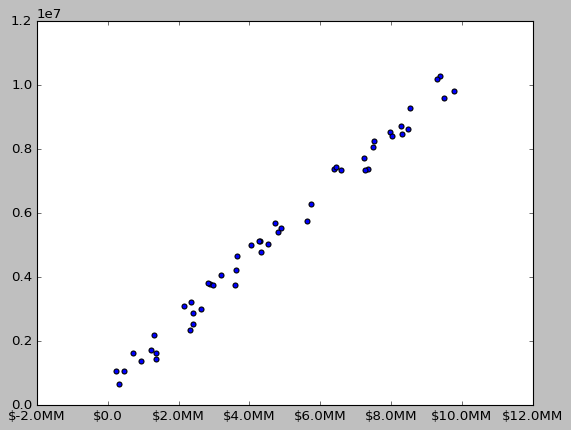

In [18]:
fig = plt.figure()
ax = plt.axes()
ax.scatter(x, y)
ax.xaxis.set_major_formatter(plt.FuncFormatter(abreviate_thousands_and_millions))

## Creating multiple plots with different arrangements

The prescribed way to create a Figure with a single Axes under the stateless approach is with `plt.subplots()`.

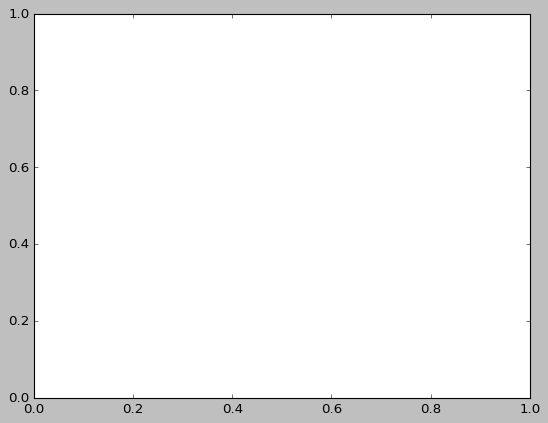

In [19]:
fig, ax = plt.subplots()

Matplotlib’s gridspec module allows for more subplot customization. Let’s say we want to create a layout like this:

In [20]:
display(Image(filename='img/empty_gridspec.png'))

FileNotFoundError: [Errno 2] No such file or directory: 'img/empty_gridspec.png'

Above, what we actually have is a 3x2 grid. ax1 is twice the height and width of ax2/ax3, meaning that it takes up two columns and two rows.

In [21]:
display(Image(filename='img/empty_gridspec_annot.png'))

FileNotFoundError: [Errno 2] No such file or directory: 'img/empty_gridspec_annot.png'

The second argument to subplot2grid() is the (row, column) location of the Axes within the grid:

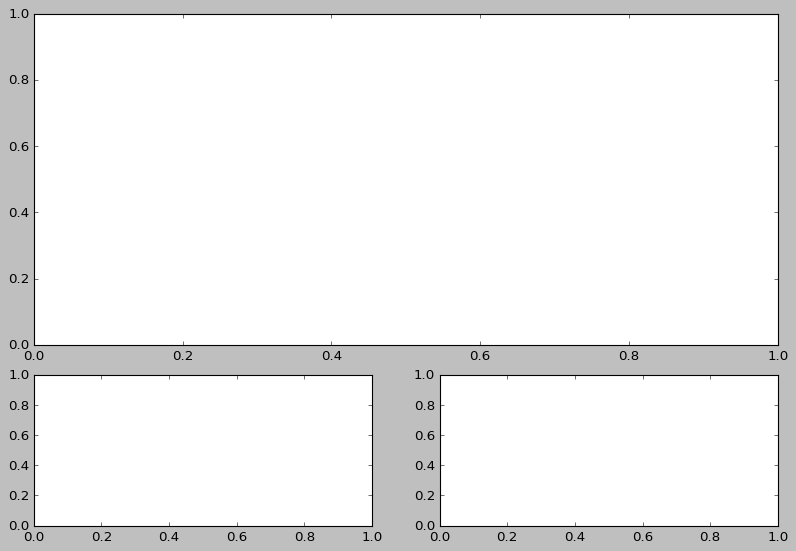

In [22]:
gridsize = (3, 2)
fig = plt.figure(figsize=(12, 8))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid(gridsize, (2, 0))
ax3 = plt.subplot2grid(gridsize, (2, 1))

Now, we can proceed as normal, modifying each Axes individually:

(array([1., 3., 3., 0., 0., 3., 0., 0., 1., 2., 3., 4., 1., 1., 2., 3., 2.,
        1., 1., 0., 1., 2., 1., 4., 5., 2., 1., 1., 1., 1.]),
 array([ 301417. ,  621441.7,  941466.4, 1261491.1, 1581515.8, 1901540.5,
        2221565.2, 2541589.9, 2861614.6, 3181639.3, 3501664. , 3821688.7,
        4141713.4, 4461738.1, 4781762.8, 5101787.5, 5421812.2, 5741836.9,
        6061861.6, 6381886.3, 6701911. , 7021935.7, 7341960.4, 7661985.1,
        7982009.8, 8302034.5, 8622059.2, 8942083.9, 9262108.6, 9582133.3,
        9902158. ]),
 <BarContainer object of 30 artists>)

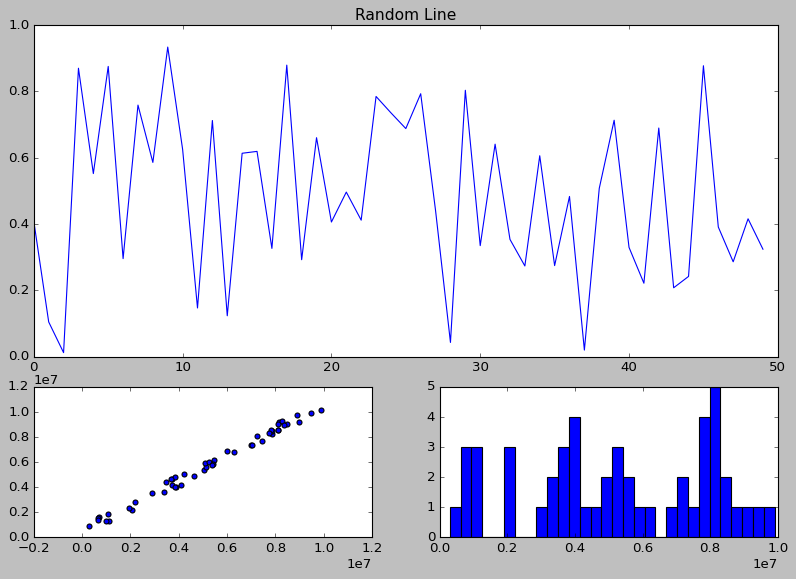

In [23]:
gridsize = (3, 2)
fig = plt.figure(figsize=(12, 8))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid(gridsize, (2, 0))
ax3 = plt.subplot2grid(gridsize, (2, 1))

ax1.set_title('Random Line', fontsize=14)
ax1.plot(np.random.rand(50))
x = np.random.randint(low=200, high=10000000, size=50)
y = x + np.random.randint(1, 1000000, size=x.size)
ax2.scatter(x=x, y=y)
ax3.hist(x, bins=30)

## Increasing font for all plots

Sometimes the plot font can be really small, making it complicated to read titles and labels. There's a very simple way of setting the font for all plots to a certain size with ``plt.rc``, it adjusts Matplolib's runtime config:

In [24]:
import matplotlib
font = {'family' : 'normal',
        'size'   : 15}
matplotlib.rc('font', **font)

Text(0.5, 1.0, 'Bigger Font')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


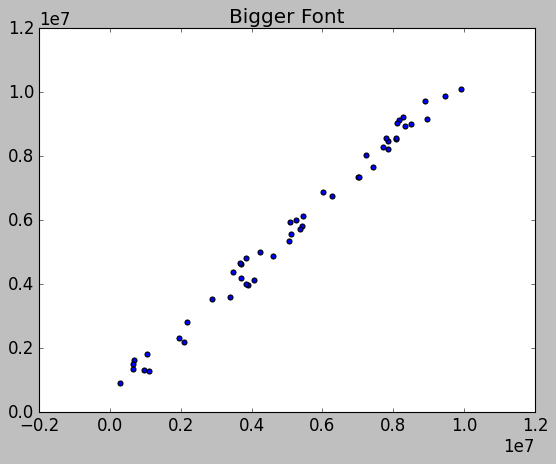

In [25]:
fig = plt.figure()
ax = plt.axes()
ax.scatter(x, y)
ax.set_title('Bigger Font')

## Setting plotting styles

A fun way of customizing graphs is by setting plot styles, you can check out more styles [here](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html).

Text(0.5, 1.0, 'ggplot')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


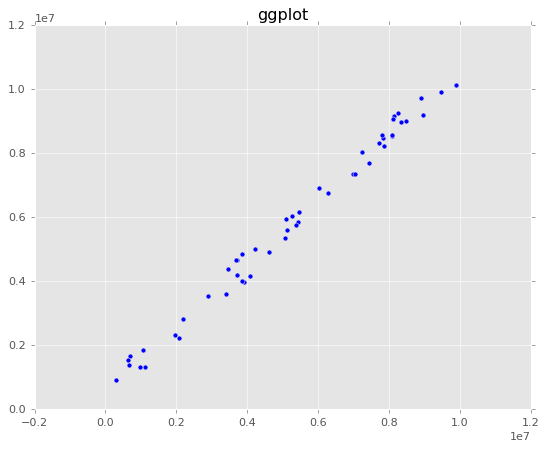

In [26]:
plt.style.use('ggplot')
fig = plt.figure()
ax = plt.axes()
ax.scatter(x, y)
ax.set_title('ggplot')

Text(0.5, 1.0, 'seaborn')

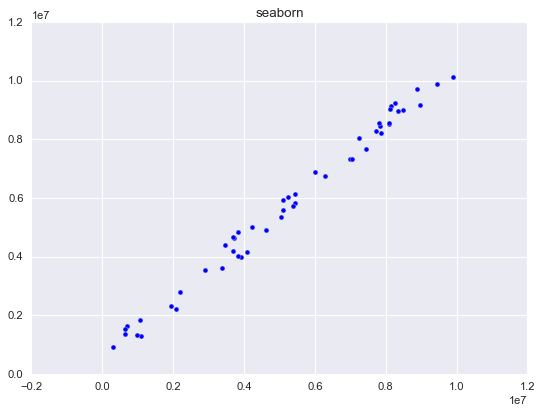

In [27]:
plt.style.use('seaborn')
fig = plt.figure()
ax = plt.axes()
ax.scatter(x, y)
ax.set_title('seaborn')